In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Ensure plots display in the notebook
%matplotlib inline


In [ ]:
dataset = pd.read_csv('/content/human_vital_signs_dataset.csv')

In [ ]:
dataset.head(5)

,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP,Risk Category
0,1,60,12,2024-07-19 21:53:00,36.861707,95.702046,124,86,37,Female,91.541618,1.679351,0.121033,38,32.459031,98.666667,High Risk
1,2,63,18,2024-07-19 21:52:00,36.511633,96.689413,126,84,77,Male,50.704921,1.992546,0.117062,42,12.771246,98.000000,High Risk
2,3,63,15,2024-07-19 21:51:00,37.052049,98.508265,131,78,68,Female,90.316760,1.770228,0.053200,53,28.821069,95.666667,Low Risk
3,4,99,16,2024-07-19 21:50:00,36.654747,95.011801,118,72,41,Female,96.006188,1.833629,0.064475,46,28.554611,87.333333,High Risk
4,5,69,16,2024-07-19 21:49:00,36.975098,98.623792,138,76,25,Female,56.020006,1.866419,0.118484,62,16.081438,96.666667,High Risk


In [ ]:
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'], dayfirst=True)

In [ ]:
dataset = dataset.dropna(subset=['Timestamp', 'Heart Rate'])


In [ ]:
dataset = dataset.sort_values(by=['Patient ID', 'Timestamp'])


In [ ]:
patient_id = dataset['Patient ID'].iloc[0]  # Adjust as needed
patient_data = dataset[dataset['Patient ID'] == patient_id]

In [ ]:
patient_data.set_index('Timestamp', inplace=True)


In [ ]:
print(patient_data.head())

                     Patient ID  Heart Rate  Respiratory Rate  \
Timestamp                                                       
2024-07-19 21:53:00           1          60                12   

                     Body Temperature  Oxygen Saturation  \
Timestamp                                                  
2024-07-19 21:53:00         36.861707          95.702046   

                     Systolic Blood Pressure  Diastolic Blood Pressure  Age  \
Timestamp                                                                     
2024-07-19 21:53:00                      124                        86   37   

                     Gender  Weight (kg)  Height (m)  Derived_HRV  \
Timestamp                                                           
2024-07-19 21:53:00  Female    91.541618    1.679351     0.121033   

                     Derived_Pulse_Pressure  Derived_BMI  Derived_MAP  \
Timestamp                                                               
2024-07-19 21:53:00            

In [ ]:
print(patient_data['Heart Rate'].isna().sum())

0


In [ ]:
# Drop rows with NaN values in the 'Heart Rate' column
patient_data = patient_data.dropna(subset=['Heart Rate'])

# Or, fill NaN values with a specific value (e.g., the previous value)
patient_data['Heart Rate'] = patient_data['Heart Rate'].fillna(method='ffill')
patient_data['Heart Rate'] = patient_data['Heart Rate'].ffill()
patient_data['Heart Rate'] = patient_data['Heart Rate'].bfill()


<ipython-input-22-49a71b0f9da3>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patient_data['Heart Rate'] = patient_data['Heart Rate'].fillna(method='ffill')


In [ ]:
# If the index is not datetime, convert it to a proper datetime index
patient_data.index = pd.to_datetime(patient_data.index)


In [ ]:
print(patient_data['Heart Rate'].describe())


count     1.0
mean     60.0
std       NaN
min      60.0
25%      60.0
50%      60.0
75%      60.0
max      60.0
Name: Heart Rate, dtype: float64


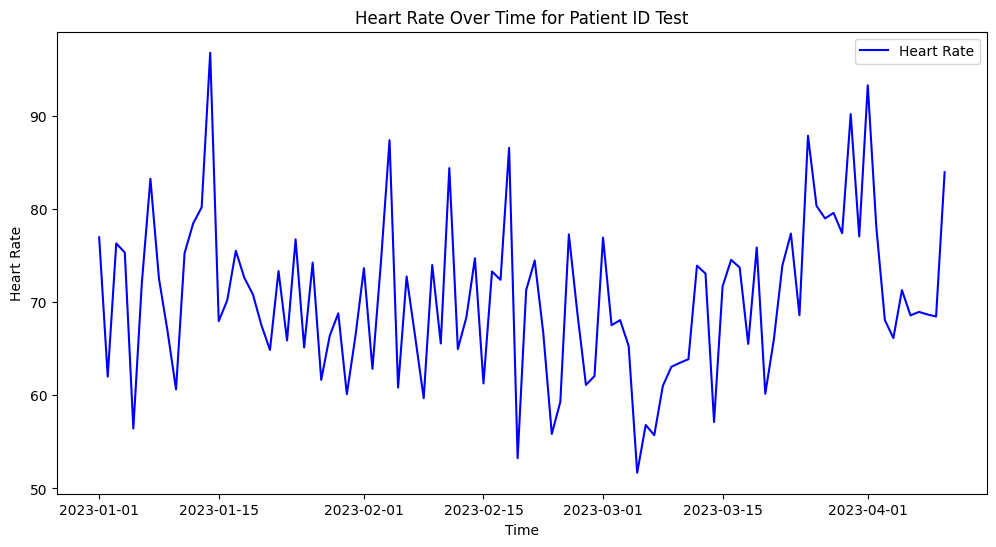

In [ ]:
import pandas as pd
import numpy as np

# Create some synthetic time data and heart rate data
time = pd.date_range(start='2023-01-01', periods=100, freq='D')
heart_rate = np.random.normal(loc=70, scale=10, size=100)

# Create a simple DataFrame for testing
test_data = pd.DataFrame({'Heart Rate': heart_rate}, index=time)

# Plot the synthetic data
plt.figure(figsize=(12, 6))
sns.lineplot(data=test_data, x=test_data.index, y='Heart Rate', label='Heart Rate', color='blue')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.title(f'Heart Rate Over Time for Patient ID Test')
plt.legend()
plt.show()


In [ ]:
train_size = int(len(patient_data) * 0.8)
train, test = patient_data['Heart Rate'][:train_size], patient_data['Heart Rate'][train_size:]

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Create some synthetic time data and heart rate data
time = pd.date_range(start='2023-01-01', periods=100, freq='D')
heart_rate = np.random.normal(loc=70, scale=10, size=100)

# Create a simple DataFrame for testing
test_data = pd.DataFrame({'Heart Rate': heart_rate}, index=time)

# Split data into train and test sets
train_size = int(len(test_data) * 0.8)
train, test = test_data['Heart Rate'][:train_size], test_data['Heart Rate'][train_size:]

# Initialize the ARIMA model (p=5, d=1, q=0)
model = ARIMA(train, order=(5, 1, 0))

# Fit the model
model_fit = model.fit()

# Forecast the next 'len(test)' periods (future heart rate values)
forecast = model_fit.forecast(steps=len(test))

# Print the forecasted values
print(forecast)

2023-03-22    71.025152
2023-03-23    76.351289
2023-03-24    76.703418
2023-03-25    73.548014
2023-03-26    74.277677
2023-03-27    73.325962
2023-03-28    75.467022
2023-03-29    75.102923
2023-03-30    74.158929
2023-03-31    74.400366
2023-04-01    74.142303
2023-04-02    74.947374
2023-04-03    74.652197
2023-04-04    74.397316
2023-04-05    74.465722
2023-04-06    74.414429
2023-04-07    74.698800
2023-04-08    74.541636
2023-04-09    74.483632
2023-04-10    74.498781
Freq: D, Name: predicted_mean, dtype: float64


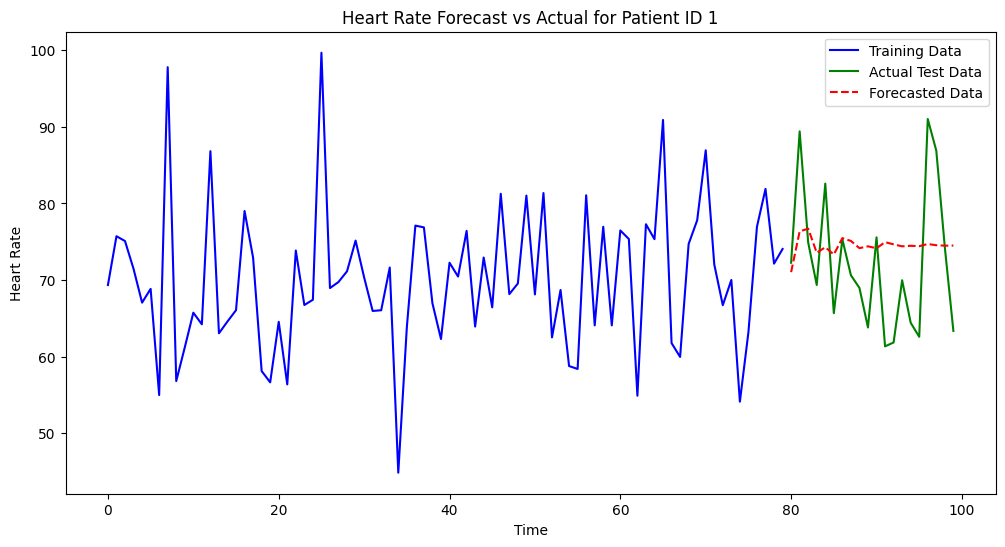

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'patient_data' is your DataFrame and the train-test split is done correctly

# Generate x-axis values for training data (same length as 'train')
# FIX: Create a range of indices with the same length as 'train'
train_x = range(len(train))

# Generate x-axis values for testing data (same length as 'test')
# FIX: Create a range of indices, offset by the training data size
test_x = range(len(train), len(train) + len(test))

# Forecasted data will have the same length as the test set
# FIX: Create a range of indices, offset by the training data size
forecast_x = test_x  # Forecast data uses the same time period as the test data


# Ensure the forecast is the same length as the test data
forecast = model_fit.forecast(steps=len(test))  # Ensure forecast length matches test

# Plot the training data, actual test data, and forecasted data
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(train_x, train, label='Training Data', color='blue')

# Plot actual test data
plt.plot(test_x, test, label='Actual Test Data', color='green')

# Plot forecasted data
plt.plot(forecast_x, forecast, label='Forecasted Data', color='red', linestyle='--')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.title(f'Heart Rate Forecast vs Actual for Patient ID {patient_id}')
plt.legend()

# Show the plot
plt.show()

In [ ]:
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 7.547839963680961
Root Mean Squared Error (RMSE): 9.044160014463118
